In [6]:

from openpyxl import Workbook
import csv


wb = Workbook()
ws = wb.active
with open('food_bank.csv', 'r') as f:
    for row in csv.reader(f):
        ws.append(row)
wb.save('food_bank.xlsx')

In [7]:
# PREPARATION

# Dataframes
import pandas as pd

# Statistics
import numpy as np

# Datetime
import datetime
from datetime import datetime


# Regular Expressions
import re

# Words
import nltk
import nltk.corpus

# Plots
from plotnine import* 
import folium
import json
import os
from folium.plugins import MarkerCluster
MarkerCluster()
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.offline
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot


import matplotlib.pyplot as plt

In [39]:
# Reading in the data frame
fb = pd.read_csv('~/Desktop/food_bank.csv')

In [41]:
fb.drop(fb.iloc[:, 41:], inplace = True, axis = 1) 
# Drops the excess columns with all the weird stuff -> excess information from the original csv file
# For example, every column after 'Other Income Source' is space for 'living in home information'
# For the purposes of this analysis, we will not be including it. 

In [43]:
fb.head() # Let's see what we have

,Guest ID,Date of Birth,Address,Apartment/Suite,City/Town,State/Province,Zipcode,County,Homeless,Household Total,...,Disabled?,Employment,Retirement,SSI/Disability,Social Security,TANF/Calworks,General Assistance,Unemployment,Food Stamps,Other Income Source
0,1,3/5/1954,1901 THAU WAY,NaN,alameda,ca,94501,NaN,No,2,...,No,No,No,No,No,No,No,No,No,No
1,2,3/3/1948,NaN,NaN,alameda,ca,94590,NaN,No,1,...,No,No,No,No,No,No,No,No,No,No
2,3,3/1/1927,NaN,NaN,NaN,NaN,NaN,NaN,Yes,1,...,No,No,No,No,No,No,No,No,No,No
3,4,1/1/1983,123 MAIN ST,NaN,Alameda,CA,94501,NaN,No,1,...,No,No,No,No,No,No,No,No,No,No
4,5,3/13/1984,NaN,NaN,NaN,NaN,NaN,NaN,Yes,1,...,No,No,No,No,No,No,No,No,No,No


In [55]:
fb.dtypes

Guest ID                         int64
Date of Birth                   object
Address                         object
Apartment/Suite                 object
City/Town                       object
State/Province                  object
Zipcode                         object
County                          object
Homeless                        object
Household Total                  int64
0 to 18                          int64
19 to 64                         int64
65+                              int64
Blocked from Receiving Help     object
Home Phone                     float64
Language Spoken                 object
Gender                          object
Marital Status                  object
Spouse                          object
Nationality/Race                object
Monthly Income                 float64
Total Income                   float64
Total Expenses                   int64
Net Income                     float64
Created At                      object
Updated At               

In [61]:
# Summary Statistics
fb.describe()
# We can see from the max monthly income, total income, and net income
# that $120,000 is probably a user entered error. 
# Going to need to change all the yes and no answers to 1 or 2 values? Instead of objects need int
# - Could create a new column and have a elseif statement where yes = 1 and no = 2

# We can see that the non-integer columns are not here - this means that we will have to use frequency counts
# /manipulate our original data frame to find out more information.

,Guest ID,Household Total,0 to 18,19 to 64,65+,Home Phone,Monthly Income,Total Income,Total Expenses,Net Income
count,10426.000000,10426.000000,10426.000000,10426.000000,10426.000000,7.903000e+03,10426.000000,10426.000000,10426.0,10426.000000
mean,5225.852292,2.060330,0.486284,1.072223,0.480338,6.464196e+15,287.734914,287.811645,0.0,287.811645
std,3018.791911,1.481559,0.955436,1.135797,0.577306,5.746589e+17,1519.851619,1519.882531,0.0,1519.882531
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.000000
25%,2612.250000,1.000000,0.000000,0.000000,0.000000,5.103634e+09,0.000000,0.000000,0.0,0.000000
50%,5223.500000,1.000000,0.000000,1.000000,0.000000,5.105239e+09,0.000000,0.000000,0.0,0.000000
75%,7836.750000,3.000000,1.000000,2.000000,1.000000,5.108275e+09,262.000000,262.000000,0.0,262.000000
max,10463.000000,11.000000,8.000000,8.000000,4.000000,5.108650e+19,120000.000000,120000.000000,0.0,120000.000000


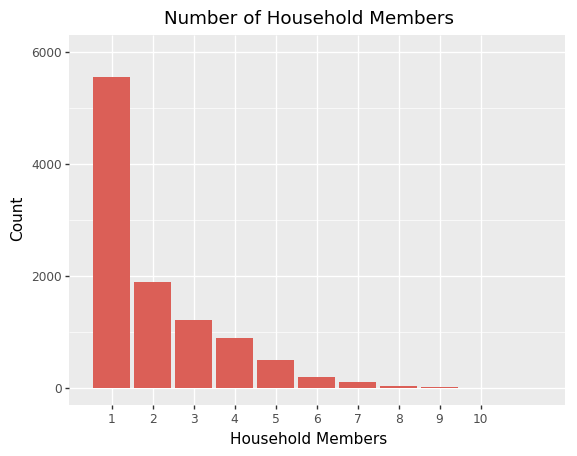

<ggplot: (-9223372029271236008)>

In [51]:
# Plot displaying household member distribution
(ggplot(fb, aes(x = "Household Total", fill ='"#FF6666"'))+geom_bar(position = position_dodge)+
labs(title = "Number of Household Members", y = "Count", x = 'Number'))+ guides(fill=False)+ylim(0,6000)+scale_x_discrete(name = 'Household Members',limits=['1','2','3','4','5','6','7','8','9','10'])

In [ ]:
# Look at net income, nationality, homeless, food bank

In [133]:
# Frequency Counts -> Race

race_counts = pd.DataFrame(fb['Nationality/Race'].value_counts()).reset_index()
race_counts.columns = [['race','count']]

race_counts.sort_values
race_counts = race_counts.drop(2)
race_counts# May want to drop the '0' race. White is predominant users, followed by African Americans and Asians. 
# Not sure why Black and Black/African American are separate


,race,count
0,Caucasian,3144
1,Black/African American,2209
3,Asian,1406
4,Other,1240
5,Native Hawaiian/Other Pacific Islander,287
6,American Indian/Alaskan Native,108
7,Black/African American/Caucasian,102
8,American Indian/Alaskan Native/Caucasian,60
9,Asian/Caucasian,59
10,Decline to state,50


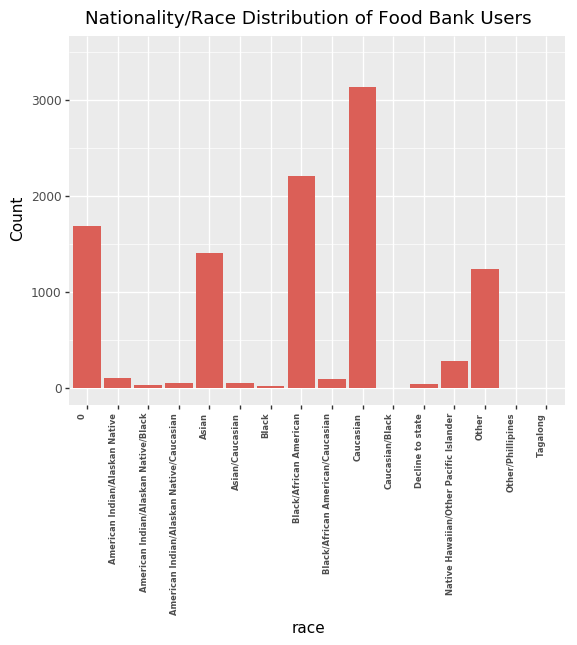

<ggplot: (-9223372029269292179)>

In [67]:
# Race plot - need to add more tick marks to y axis
(ggplot(race_counts, aes(x = "race",y = 'count',fill = '"#FF6666"'))+geom_bar(stat = 'identity',position = position_dodge)+
labs(title = "Nationality/Race Distribution of Food Bank Users", y = "Count"))+ guides(fill=False)+theme(axis_text_x = element_text(angle = 90, size = 6,hjust=1,face = 'bold'))+ylim(0,3500)



In [70]:
# Frequency Counts -> Homeless
 
home_counts = pd.DataFrame(fb['Homeless'].value_counts()).reset_index()
home_counts.columns = [['homeless','count']]
home_counts.sort_values
print(1455/(8971+1455)) # About 14% of food bank users are homeless. Need to check homeless status by race!
home_counts 

0.13955495875695376


,homeless,count
0,No,8971
1,Yes,1455


In [164]:
# Pre Setup for Homeless df
racialhome = fb.groupby(["Nationality/Race", "Homeless"]).size().reset_index(name="Count")
racialhome.columns = ['Nationality','Homeless','Count']# Removes the weird '0' race
racialhome = racialhome[racialhome.Nationality != '0'].reset_index()
racialhome.columns = ['id','Nationality','Homeless','Count']

In [134]:
# Creating a homeless data frame
homeless = racialhome[racialhome.Homeless == 'Yes'].reset_index()
del homeless['index'] # remove redundant index column
del homeless['Homeless']
homeless.columns = ['id','race','Homeless_Count']
homeless
# Now we want to merge the two datasets by race

,id,race,Homeless_Count
0,3,American Indian/Alaskan Native,12
1,5,American Indian/Alaskan Native/Black,1
2,7,American Indian/Alaskan Native/Caucasian,1
3,9,Asian,45
4,12,Black,6
5,14,Black/African American,213
6,16,Black/African American/Caucasian,1
7,18,Caucasian,277
8,21,Decline to state,2
9,23,Native Hawaiian/Other Pacific Islander,60


In [139]:
# Creating a non homeless data frame to merge with the homeless data frame above
not_homeless = racialhome[racialhome.Homeless == 'No'].reset_index()
del not_homeless['index'] # remove redundant index column
del not_homeless['Homeless']
not_homeless.columns = ['id','race','Non_Homeless_Count']
not_homeless

,id,race,Non_Homeless_Count
0,2,American Indian/Alaskan Native,96
1,4,American Indian/Alaskan Native/Black,36
2,6,American Indian/Alaskan Native/Caucasian,59
3,8,Asian,1361
4,10,Asian/Caucasian,59
5,11,Black,23
6,13,Black/African American,1996
7,15,Black/African American/Caucasian,101
8,17,Caucasian,2867
9,19,Caucasian/Black,1


In [165]:
# Merge the homeless and not homeless data frames
merged_left = pd.merge(left=not_homeless,right=homeless, how='left', left_on='race', right_on='race')
del merged_left['id_y']
merged_left['total_pop'] = merged_left.Non_Homeless_Count + merged_left.Homeless_Count
merged_left.loc[merged_left.Homeless_Count.isnull(), 'total_pop'] = merged_left['Non_Homeless_Count'] 
# Above line fixes null/NaN issues and sets total_pop for that row equal to the total non_homeless population
merged_left['Non_Homeless_Ratio'] = merged_left.Non_Homeless_Count/merged_left.total_pop
merged_left['Homeless_Ratio'] = 1-merged_left.Non_Homeless_Ratio
merged_left.loc[-1] = [100,'All',8971,1455,10426,1-0.13955495875695376,0.13955495875695376] # Adding in total population metrics for comparison
merged_left

,id_x,race,Non_Homeless_Count,Homeless_Count,total_pop,Non_Homeless_Ratio,Homeless_Ratio
0,2,American Indian/Alaskan Native,96,12.0,108.0,0.888889,0.111111
1,4,American Indian/Alaskan Native/Black,36,1.0,37.0,0.972973,0.027027
2,6,American Indian/Alaskan Native/Caucasian,59,1.0,60.0,0.983333,0.016667
3,8,Asian,1361,45.0,1406.0,0.967994,0.032006
4,10,Asian/Caucasian,59,NaN,59.0,1.000000,0.000000
5,11,Black,23,6.0,29.0,0.793103,0.206897
6,13,Black/African American,1996,213.0,2209.0,0.903576,0.096424
7,15,Black/African American/Caucasian,101,1.0,102.0,0.990196,0.009804
8,17,Caucasian,2867,277.0,3144.0,0.911896,0.088104
9,19,Caucasian/Black,1,NaN,1.0,1.000000,0.000000


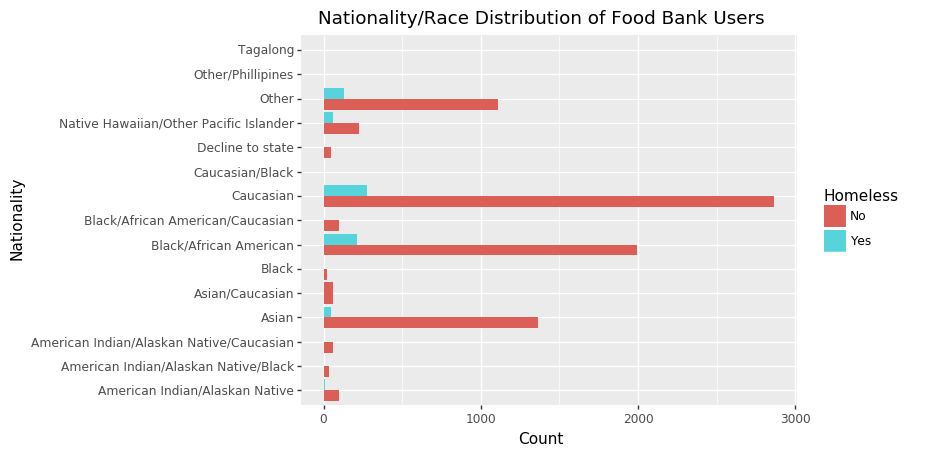

<ggplot: (-9223372029263981645)>

In [160]:
# Plot showing distribution of food bank users based on homeless status -> we can improve on this by using our ratios.
(ggplot(racialhome, aes(x = "Nationality",y = 'Count',fill = 'Homeless'))+geom_bar(stat = 'identity',position = position_dodge)+
labs(title = "Nationality/Race Distribution of Food Bank Users", y = "Count"))+coord_flip()

0.13955495875695376


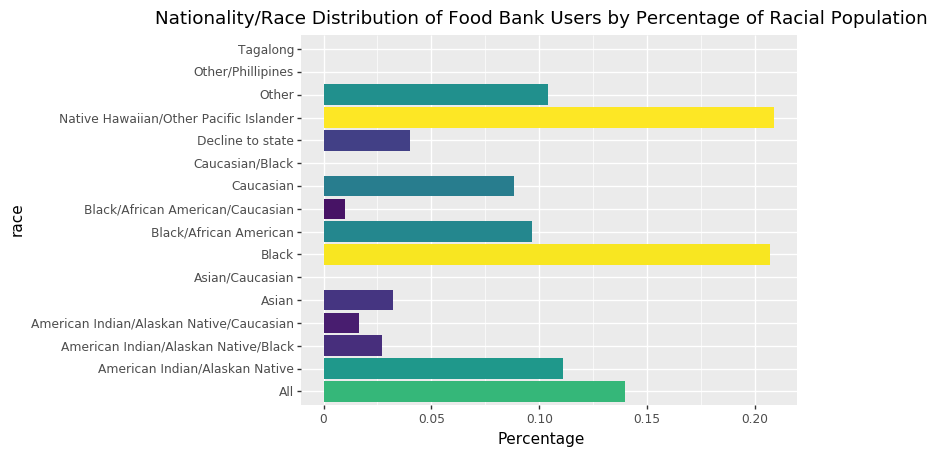

<ggplot: (7591169039)>

In [166]:
# Plot of Homeless by % of own Racial Population
print(1455/(8971+1455)) # About 14% of food bank users are homeless.
(ggplot(merged_left, aes(x = "race",y = 'Homeless_Ratio',fill = 'Homeless_Ratio'))+geom_bar(stat = 'identity',position = position_dodge)+
labs(title = "Nationality/Race Distribution of Food Bank Users by Percentage of Racial Population", y = "Percentage"))+coord_flip()+ guides(fill=False)

# Minorities overwhelmingly at risk. Mixed race individuals seem at a lower risk for homelessness.
# Must note that black and black/african american are two different bars -> we could be underrepresenting their homeless population %.

In [92]:
racialemployment = fb.groupby(["Nationality/Race", "Employment"]).size().reset_index(name="Count")
racialemployment.columns = ['Nationality','Employed','Count']
racialemployment = racialemployment[racialemployment.Nationality != '0'] # Removes the weird '0' name
racialemployment

,Nationality,Employed,Count
2,American Indian/Alaskan Native,No,86
3,American Indian/Alaskan Native,Yes,22
4,American Indian/Alaskan Native/Black,No,35
5,American Indian/Alaskan Native/Black,Yes,2
6,American Indian/Alaskan Native/Caucasian,No,46
7,American Indian/Alaskan Native/Caucasian,Yes,14
8,Asian,No,897
9,Asian,Yes,509
10,Asian/Caucasian,No,36
11,Asian/Caucasian,Yes,23


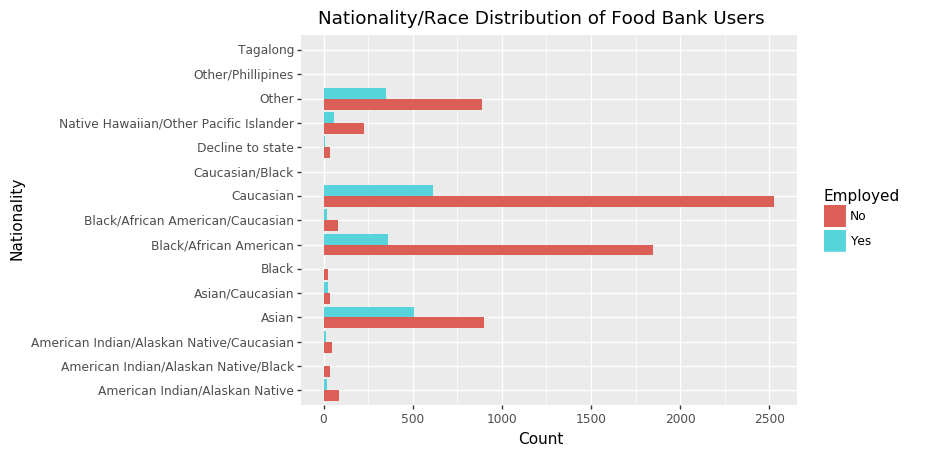

<ggplot: (-9223372029263796550)>

In [163]:
# In order to do a comparison, I need to calculate the ratio's of employment and nonemployment contingent on race
(ggplot(racialemployment, aes(x = "Nationality",y = 'Count',fill = 'Employed'))+geom_bar(stat = 'identity',position = position_dodge)+
labs(title = "Nationality/Race Distribution of Food Bank Users", y = "Count"))+coord_flip()

In [ ]:
# Things to do
# Homeless/Employed status as ratio of total per race to actually show if it is normally distributed
# Finished homeless but needs some improvements in order to be finished